# Imports

In [3]:
# Used Google Colab for this notebook
import requests
from http import HTTPStatus
!pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/
from SPARQLWrapper import SPARQLWrapper, JSON
!pip install wikipedia-api
import wikipediaapi
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english') #initialize stopwords
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk import bigrams
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 7.4 MB/s 
     |████████████████████████████████| 41 kB 677 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13476 sha256=90c0953f466e5c6aa87acf71474743c767e4ba8f7fa8c2a5513c72b70d22c4f7
  Stored in directory: /root/.cache/pip/wheels/ed/88/e3/da3d4d73cb91d659488cfa25913b84bbc26febec99d257bce9
Successfully built wikipedia-api


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Activity 3

## 3.1 Sub-activity: Loading and pre-processing of text data

### Task 1

In [51]:
# Function that returns a list of WikiData entities of humans which won the ACM Turing Award
def get_turing_award_recipients():
    
    endpoint_url = "https://query.wikidata.org/sparql"

    query = """SELECT DISTINCT ?human ?humanLabel ?genderLabel ?birth_dateLabel ?birth_placeLabel ?employerLabel ?educated_atLabel
            WHERE 
          {
            ?human wdt:P166 wd:Q185667.
            OPTIONAL{?human wdt:P21 ?gender .}       
            OPTIONAL{?human wdt:P569 ?birth_date .} 
            OPTIONAL{?human wdt:P19 ?birth_place .}  
            OPTIONAL{?human wdt:P108 ?employer .}  
            OPTIONAL{?human wdt:P69 ?educated_at .}
            
            
            SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
          }"""

    sparql = SPARQLWrapper(endpoint_url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results = get_turing_award_recipients()

{'head': {'vars': ['human',
   'humanLabel',
   'genderLabel',
   'birth_dateLabel',
   'birth_placeLabel',
   'employerLabel',
   'educated_atLabel']},
 'results': {'bindings': [{'human': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q8556'},
    'humanLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'Edsger W. Dijkstra'},
    'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'},
    'birth_dateLabel': {'type': 'literal', 'value': '1930-05-11T00:00:00Z'},
    'birth_placeLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'Rotterdam'},
    'employerLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'Radboud University Nijmegen'},
    'educated_atLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'University of Amsterdam'}},
   {'human': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q8556'},
    'humanLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'Edsger W. Dijkstra'}

In [5]:
# Gettting the results in a list
humans_awarded_with_ACM = results['results']['bindings']
print(humans_awarded_with_ACM)

[{'human': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q8556'}, 'humanLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Edsger W. Dijkstra'}, 'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'birth_dateLabel': {'type': 'literal', 'value': '1930-05-11T00:00:00Z'}, 'birth_placeLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Rotterdam'}, 'employerLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Radboud University Nijmegen'}, 'educated_atLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'University of Amsterdam'}}, {'human': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q8556'}, 'humanLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Edsger W. Dijkstra'}, 'genderLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'male'}, 'birth_dateLabel': {'type': 'literal', 'value': '1930-05-11T00:00:00Z'}, 'birth_placeLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Rotterdam'}, 'employerLabel': {'xml:lang': 'en', '


### Task 2


In [6]:
# Function that takes as input a Wikidata ID and returns the content of the English Wikipedia page for this entity.
def  get_wikipedia_content(wikidata_id):
  url = 'http://www.wikidata.org/entity/{}'.format(wikidata_id)

  # for every entity in the list humans_awarded_with_ACM
  for entity in humans_awarded_with_ACM:
    # if the url is the same as the url in the enrity
    if url == entity['human']['value']:
      # getting the name of the entity/human
      name = entity['humanLabel']['value']
      # wikipedia api
      wiki_wiki = wikipediaapi.Wikipedia('en')
      page_py = wiki_wiki.page(name)
      # if the page exists return content, if not return None
      if page_py.exists():
        return(page_py.summary)
      else:
        return None

Edsger Wybe Dijkstra ( DYKE-strə; Dutch: [ˈɛtsxər ˈʋibə ˈdɛikstra] (listen); 11 May 1930 – 6 August 2002) was a Dutch computer scientist, programmer, software engineer, systems scientist, and science essayist. He received the 1972 Turing Award for fundamental contributions to developing programming languages, and was the Schlumberger Centennial Chair of Computer Sciences at The University of Texas at Austin from 1984 until 2000.
Shortly before his death in 2002, he received the ACM PODC Influential Paper Award in distributed computing for his work on self-stabilization of program computation. This annual award was renamed the Dijkstra Prize the following year, in his honor.


### Task 3

In [52]:
# Creating a list where the new dictionay of each entity is going to be stored 
list_of_entities = []
# Creating a list fot the ids of the entities. It is going to be used later when creating the dictionaries, to see whether a dictionary with the same id 
# has been created. If a dictionary with the id exists, then the additional values such as employer and educated_ad, are going to be appended in the dicionary
# of the entity
listt_of_ids = []
# Getting the list of entities we had from before
humans_awarded_with_ACM = results['results']['bindings']

# In this loop a new dictionary for each entity is going to be crated and then saved in a list
for entity in humans_awarded_with_ACM:
  # Initialising the new dictionary of the entity
  new_dict = {}
  # Getting the id from the url stored in the dictionary of the entity from the list humans_awarded_with_ACM
  id = entity['human']['value']
  id_clean = re.findall('/([A-Z][0-9]+)', id)[0]

  #if the id is not in the list
  if id_clean not in listt_of_ids:
    # Adding the id in the listt_of_ids
    listt_of_ids.append(id_clean)

    # Creating a key - value pair for the id
    new_dict['id'] = id_clean

    # Creating a key - value pair for the name 
    name = entity['humanLabel']['value']
    new_dict['name'] = name

    # Creating a key - value pair for the intro using the function get_wikipedia_content()
    # intro = get_wikipedia_content(id_clean).partition('\n')[0]
    intro = get_wikipedia_content(id_clean)
    new_dict['intro'] = intro

    # Creating a key - value pair for the gender
    gender = entity['genderLabel']['value']
    new_dict['gender'] = gender

    # Creating a key - value pair for the birth_date
    birth_date = entity['birth_dateLabel']['value']
    new_dict['birth_date'] = birth_date

    # Creating a key - value pair for the birth_place if it exists
    if 'birth_placeLabel' in entity.keys():
      birth_place = entity['birth_placeLabel']['value']
    else:
      birth_place = None
    new_dict['birth_date'] = birth_date
    
    # Creating a key - value pair for the employer
    employer = entity['employerLabel']['value']
    new_dict['employer'] = [employer]

    # Creating a key - value pair for the educated_at
    educated_atLabel = entity['educated_atLabel']['value']
    new_dict['educated_at'] = [educated_atLabel]

    #Appending the new dictionary that has been creates in the list list_of_entities
    list_of_entities.append(new_dict)
  
  # If the ditionary already exists
  else:
    # Getting the employer value from the previous enrity dictionary
    employer = entity['employerLabel']['value']

    # Getting the educated_at value from the previous enrity dictionary
    educated_atLabel = entity['educated_atLabel']['value']

    # When the id of the entity matches the entity of the already created dictionary of the entity. The values of 
    # emplyer and educated add are added into the dictionary
    for ent in list_of_entities:
      if ent['id'] == id_clean:
        if employer not in ent['employer']:
          ent['employer'].append(employer)
        if educated_atLabel not in ent['educated_at']:
          ent['educated_at'].append(educated_atLabel)

# deleting the ids because we do not need them
for x in list_of_entities:
  del x['id']

In [54]:
# Creating the award_winners dictionary based on the list list_of_entities in which the entities are stored
award_winners = {}
for k in list_of_entities[0]:
    award_winners[k] = [d[k] for d in list_of_entities]

award_winners

{'name': ['Edsger W. Dijkstra',
  'Alan Perlis',
  'Maurice Wilkes',
  'Frances E. Allen',
  'Tim Berners-Lee',
  'Dana Scott',
  'Shafrira Goldwasser',
  'Donald Knuth',
  'Dennis M. Ritchie',
  'Bob Kahn',
  'Tony Hoare',
  'James H. Wilkinson',
  'Stephen Cook',
  'Andrew Yao',
  'John Edward Hopcroft',
  'Charles Bachman',
  'Jim Gray',
  'Ivan Sutherland',
  'Edgar F. Codd',
  'Niklaus Wirth',
  'Alfred Aho',
  'Douglas Engelbart',
  'Leslie Lamport',
  'Richard Hamming',
  'Fred Brooks',
  'Juris Hartmanis',
  'Fernando J. Corbató',
  'Peter Naur',
  'Kenneth E. Iverson',
  'John Cocke',
  'Manuel Blum',
  'Richard M. Karp',
  'John Backus',
  'Jack Dongarra',
  'Amir Pnueli',
  'Alan Kay',
  'Robert Tarjan',
  'Edmund M. Clarke',
  'Robert W. Floyd',
  'John McCarthy',
  'Michael Stonebraker',
  'Robin Milner',
  'Jeffrey David Ullman',
  'Vint Cerf',
  'Butler Lampson',
  'Iosif Sifakis',
  'Kristen Nygaard',
  'Ole-Johan Dahl',
  'William Kahan',
  'Yann LeCun',
  'Martin Edwa

### Task 4

In [10]:
# Printing the name of all award winners in alphabetical order.
names = award_winners['name']
print(sorted(names))

['Adi Shamir', 'Alan Kay', 'Alan Perlis', 'Alfred Aho', 'Allen Newell', 'Amir Pnueli', 'Andrew Yao', 'Barbara Liskov', 'Bob Kahn', 'Butler Lampson', 'Charles Bachman', 'Charles P. Thacker', 'Dana Scott', 'David A. Patterson', 'Dennis M. Ritchie', 'Donald Knuth', 'Douglas Engelbart', 'E. Allen Emerson', 'Edgar F. Codd', 'Edmund M. Clarke', 'Edsger W. Dijkstra', 'Edward Feigenbaum', 'Edwin Catmull', 'Fernando J. Corbató', 'Frances E. Allen', 'Fred Brooks', 'Geoffrey Hinton', 'Herbert Simon', 'Iosif Sifakis', 'Ivan Sutherland', 'Jack Dongarra', 'James H. Wilkinson', 'Jeffrey David Ullman', 'Jim Gray', 'John Backus', 'John Cocke', 'John Edward Hopcroft', 'John L. Hennessy', 'John McCarthy', 'Judea Pearl', 'Juris Hartmanis', 'Ken Thompson', 'Kenneth E. Iverson', 'Kristen Nygaard', 'Leonard Adleman', 'Leslie Lamport', 'Leslie Valiant', 'Manuel Blum', 'Martin Edward Hellman', 'Marvin Minsky', 'Maurice Wilkes', 'Michael O. Rabin', 'Michael Stonebraker', 'Niklaus Wirth', 'Ole-Johan Dahl', 'Pat 

### Task 5

In [11]:
# define a custom function that finds the most common words in a string
def find_common_words(text):
  # if the text is not None
  if text != None:
    words = text.split()
    common_words = Counter(words).most_common(10)
    common_words = [word[0] for word in common_words]
    return common_words

# define a custom function that preprocesses the text and finds the most common words
def preprocess_and_count(text):
    # split the text into words
    if text != None:
      words = text.split()

      words = word_tokenize(text)
      # remove English stop words and punctuation
      words = [w for w in words if w not in stop_words and w.isalpha()]

      # find the most common words using the Counter class
      common_words = Counter(words).most_common(10)
      common_words = [word[0] for word in common_words]
      return common_words

award_winners_intro = pd.DataFrame(award_winners)
award_winners_intro.drop(['gender', 'birth_date','employer','educated_at'], axis=1, inplace=True)
award_winners_intro.rename(columns = {'name':'winner_name'}, inplace = True)

award_winners_intro['count_words'] = award_winners_intro['intro'].str.split().str.len()
# award_winners_intro['count_sentences'] = award_winners_intro['intro'].apply(lambda x: len(nltk.sent_tokenize(x)))
award_winners_intro['count_sentences'] = award_winners_intro['intro'].str.count('[.!?]')
award_winners_intro['count_paragraphs'] = award_winners_intro['intro'].str.split('\n').str.len()

# apply the function find_common_words to find the most common words in the intro text
award_winners_intro['common_words'] = award_winners_intro['intro'].apply(find_common_words) #.apply(lambda x: Counter(x.split()).most_common(10))

# apply the function preprocess_and_count which removes English stopwords and punctuation tokens before recalculating the top-10 frequent words
award_winners_intro['common_words_after_preprocessing'] = award_winners_intro['intro'].apply(preprocess_and_count)

del award_winners_intro['intro']
award_winners_intro

,winner_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,Edsger W. Dijkstra,102.0,4.0,2.0,"[the, was, of, his, in, Dijkstra, scientist,, ...","[Dijkstra, Dutch, scientist, received, Award, ..."
1,Alan Perlis,46.0,2.0,1.0,"[and, was, the, Alan, Jay, Perlis, (April, 1,,...","[University, Alan, Jay, Perlis, April, Februar..."
2,Maurice Wilkes,72.0,2.0,1.0,"[the, of, a, Wilkes, was, who, and, Sir, Mauri...","[Wilkes, unit, Sir, Maurice, Vincent, June, No..."
3,Frances E. Allen,70.0,4.0,1.0,"[and, the, was, in, to, Allen, 4,, an, first, ...","[Allen, August, compilers, first, woman, IBM, ..."
4,Tim Berners-Lee,356.0,17.0,1.0,"[the, of, and, He, a, is, Web, as, World, Wide]","[Web, He, World, Wide, Computer, Science, MIT,..."
...,...,...,...,...,...,...
70,Peter Naur,53.0,3.0,1.0,"[the, a, He, to, Peter, Naur, (25, October, 19...","[He, Peter, Naur, October, January, Danish, co..."
71,Kenneth E. Iverson,74.0,2.0,1.0,"[the, of, programming, in, and, to, was, for, ...","[programming, APL, language, Kenneth, Eugene, ..."
72,John Cocke,72.0,1.0,8.0,"[John, Cocke, American, the, in, politician, a...","[John, Cocke, American, computer, scientist, p..."
73,Manuel Blum,38.0,1.0,1.0,"[the, of, to, and, Manuel, Blum, (born, 26, Ap...","[Manuel, Blum, born, April, computer, scientis..."


## 3.2 Sub-activity: Applying NLP operations on the corpus



### 3.2.1 Stemming

#### Task 3

In [48]:
# function to remove stopwords and punctuations from texts
def clean_texts(texts):
  clean_texts = []
  for text in texts:
    # tokenize words in text
    text = str(text)
    words = word_tokenize(text)
    # remove stopwords and punctuations from words
    words = [word for word in words if word not in stop_words and word.isalpha()]
    # join cleaned words and append to list
    clean_texts.append(" ".join(words))
  
  return clean_texts

# list intro_words with the cleaned text
intro_words = clean_texts(award_winners["intro"])

['Edsger Wybe Dijkstra Dutch ˈɛtsxər ˈʋibə ˈdɛikstra listen May August Dutch computer scientist programmer software engineer systems scientist science essayist He received Turing Award fundamental contributions developing programming languages Schlumberger Centennial Chair Computer Sciences The University Texas Austin Shortly death received ACM PODC Influential Paper Award distributed computing work program computation This annual award renamed Dijkstra Prize following year honor',
 'Alan Jay Perlis April February American computer scientist professor Purdue University Carnegie Mellon University Yale University He best known pioneering work programming languages first recipient Turing Award',
 'Sir Maurice Vincent Wilkes June November British computer scientist designed helped build Electronic Delay Storage Automatic Calculator EDSAC one earliest stored program computers invented microprogramming method using logic operate control unit central processing unit circuits At time death Wil

In [49]:
# Calculating and Printing the number of unique words in intro_words

def unique_words_counter(texts):
   # initialize set for storing unique words
    unique_words = set()
    for text in texts:
        text = str(text)
        # tokenize words in text
        words = word_tokenize(text)
        # add words to set
        unique_words.update(words)
    # return length of set
    return len(unique_words)

print(unique_words_counter(intro_words))


1497


In [50]:
# Calculating and Printing the number of unique words in intro_words after stemming

def unique_stemmed_words(texts):
  # initialize set for storing unique words
  unique_words = set()
  # initialize stemmer
  stemmer = PorterStemmer()
  for text in texts:
      # tokenize words in text
      words = word_tokenize(text)
      # stem words
      stemmed_words = [stemmer.stem(word) for word in words]
      # add words to set
      unique_words.update(stemmed_words)
  # return length of set
  return len(unique_words)

print(unique_stemmed_words(intro_words))




1224


#### Task 4

In [15]:
def unique_stemmed_words_Snowball(texts):
  # initialize set for storing unique words
  unique_words = set()
  for text in texts:
    # initialize SnowballStemmer
    stemmer = SnowballStemmer("english")  
    # tokenize words in text
    words = word_tokenize(text)
    # stem words
    stemmed_words = [stemmer.stem(word) for word in words]
    # add words to set
    unique_words.update(stemmed_words)
  # return length of set
  return len(unique_words)

print(unique_stemmed_words_Snowball(intro_words))


1221


### 3.2.2 Lemmatization

#### Task 5

In [16]:
def unique_lemmatized_words(texts):
  # initialize set for storing unique words
  unique_words = set()
  for text in texts:
    # initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # tokenize words in text
    words = word_tokenize(text)
    # stem words
    stemmed_words = [lemmatizer.lemmatize(word) for word in words]
    # add words to set
    unique_words.update(stemmed_words)
  # return length of set
  return len(unique_words)

print(unique_lemmatized_words(intro_words))

1450


### 3.2.3 Finding synonyms and antonyms

#### Task 6

In [47]:
# adding two new columns to the award winners intro dataframe: synonyms, antonyms
award_winners_intro["synonyms"] = None
award_winners_intro["antonyms"] = None

# function to find synonyms of words in list
def get_synonyms(texts):
    # initialize list for storing synonyms
    synonyms = []
    # check if there is a list of words
    if texts != None:
      # iterate through words in list
      for text in texts:
          # get Synset objects for word
          synsets = wordnet.synsets(text)
          # check if the list of synset objects is not empty
          if len(synsets) != 0:
            # get synonyms of word
            word_synonyms = synsets[0].lemma_names()
            # add synonyms to list
            synonyms.extend(word_synonyms)

    return synonyms

# updating synonyms column with the synonyms of the common_words_after_preprocessing words by applying the get_synonyms function
award_winners_intro["synonyms"] = award_winners_intro['common_words_after_preprocessing'].apply(get_synonyms)

award_winners_intro

,winner_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,Edsger W. Dijkstra,102.0,4.0,2.0,"[the, was, of, his, in, Dijkstra, scientist,, ...","[Dijkstra, Dutch, scientist, received, Award, ...","[Dutch, Dutch_people, scientist, receive, have...",[]
1,Alan Perlis,46.0,2.0,1.0,"[and, was, the, Alan, Jay, Perlis, (April, 1,,...","[University, Alan, Jay, Perlis, April, Februar...","[university, Jay, John_Jay, April, Apr, Februa...",[]
2,Maurice Wilkes,72.0,2.0,1.0,"[the, of, a, Wilkes, was, who, and, Sir, Mauri...","[Wilkes, unit, Sir, Maurice, Vincent, June, No...","[Wilkes, John_Wilkes, unit_of_measurement, uni...",[]
3,Frances E. Allen,70.0,4.0,1.0,"[and, the, was, in, to, Allen, 4,, an, first, ...","[Allen, August, compilers, first, woman, IBM, ...","[Allen, Gracie_Allen, Grace_Ethel_Cecile_Rosal...",[man]
4,Tim Berners-Lee,356.0,17.0,1.0,"[the, of, and, He, a, is, Web, as, World, Wide]","[Web, He, World, Wide, Computer, Science, MIT,...","[web, helium, He, atomic_number_2, universe, e...","[narrow, ignore]"
...,...,...,...,...,...,...,...,...
70,Peter Naur,53.0,3.0,1.0,"[the, a, He, to, Peter, Naur, (25, October, 19...","[He, Peter, Naur, October, January, Danish, co...","[helium, He, atomic_number_2, Peter, Simon_Pet...",[]
71,Kenneth E. Iverson,74.0,2.0,1.0,"[the, of, programming, in, and, to, was, for, ...","[programming, APL, language, Kenneth, Eugene, ...","[scheduling, programming, programing, language...",[]
72,John Cocke,72.0,1.0,8.0,"[John, Cocke, American, the, in, politician, a...","[John, Cocke, American, computer, scientist, p...","[toilet, lavatory, lav, can, john, privy, bath...",[]
73,Manuel Blum,38.0,1.0,1.0,"[the, of, to, and, Manuel, Blum, (born, 26, Ap...","[Manuel, Blum, born, April, computer, scientis...","[Born, Max_Born, April, Apr, computer, computi...",[]


In [22]:
# function to find synonyms of words in list
def get_antonyms(texts):
    # initialize list for storing synonyms
    antonyms = []
    # check if there is a list of words
    if texts != None:
      # iterate through words in list
      for text in texts:
        # get Synset objects for word
        synsets = wordnet.synsets(text)
        # iterate through Lemma objects in Synset object
        if len(synsets) != 0:
          for lemma in synsets[0].lemmas():
            # get antonyms of Lemma object
            lemma_antonyms = lemma.antonyms()
            # add antonyms to list
            antonyms.extend([antonym.name() for antonym in lemma_antonyms])

    return antonyms

# updating antonyms column with the antonyms of the common_words_after_preprocessing words by applying the get_antonyms function
award_winners_intro["antonyms"] = award_winners_intro['common_words_after_preprocessing'].apply(get_antonyms)

In [23]:
award_winners_intro.head(10)

,winner_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,Edsger W. Dijkstra,102.0,4.0,2.0,"[the, was, of, his, in, Dijkstra, scientist,, ...","[Dijkstra, Dutch, scientist, received, Award, ...","[Dutch, Dutch_people, scientist, receive, have...",[]
1,Alan Perlis,46.0,2.0,1.0,"[and, was, the, Alan, Jay, Perlis, (April, 1,,...","[University, Alan, Jay, Perlis, April, Februar...","[university, Jay, John_Jay, April, Apr, Februa...",[]
2,Maurice Wilkes,72.0,2.0,1.0,"[the, of, a, Wilkes, was, who, and, Sir, Mauri...","[Wilkes, unit, Sir, Maurice, Vincent, June, No...","[Wilkes, John_Wilkes, unit_of_measurement, uni...",[]
3,Frances E. Allen,70.0,4.0,1.0,"[and, the, was, in, to, Allen, 4,, an, first, ...","[Allen, August, compilers, first, woman, IBM, ...","[Allen, Gracie_Allen, Grace_Ethel_Cecile_Rosal...",[man]
4,Tim Berners-Lee,356.0,17.0,1.0,"[the, of, and, He, a, is, Web, as, World, Wide]","[Web, He, World, Wide, Computer, Science, MIT,...","[web, helium, He, atomic_number_2, universe, e...","[narrow, ignore]"
5,Dana Scott,83.0,3.0,1.0,"[the, is, of, and, in, work, on, Dana, Stewart...","[University, work, theory, Dana, Stewart, Scot...","[university, work, theory, Danu, Dana, Stewart...",[]
6,Shafrira Goldwasser,70.0,2.0,1.0,"[of, the, and, at, is, scientist, Institute, S...","[scientist, Science, Institute, Shafrira, Gold...","[scientist, science, scientific_discipline, in...",[]
7,Donald Knuth,183.0,8.0,2.0,"[the, of, and, Knuth, computer, is, to, analys...","[Knuth, computer, science, analysis, algorithm...","[computer, computing_machine, computing_device...",[]
8,Dennis M. Ritchie,103.0,6.0,1.0,"[the, in, and, Ritchie, was, from, He, program...","[Ritchie, He, C, programming, language, Thomps...","[helium, He, atomic_number_2, degree_centigrad...",[]
9,Bob Kahn,54.0,2.0,2.0,"[the, Kahn, with, Vint, Protocol, Robert, Elli...","[Kahn, Vint, Cerf, Protocol, Internet, Robert,...","[Kahn, Louis_Isadore_Kahn, protocol, communica...",[]


### 3.2.4 Bigrams and trigrams

#### Task 7

In [46]:
# function that tokenizes texts
def tokenize_text(texts):
  tokenized_texts = []
  for text in texts:
    text = str(text)
    # tokenize words in text
    words = word_tokenize(text)
    tokenized_texts.append(words)

  return tokenized_texts

# tokenized texts
tokenized_texts = tokenize_text(award_winners["intro"])
tokenized_texts

[['Edsger',
  'Wybe',
  'Dijkstra',
  '(',
  'DYKE-strə',
  ';',
  'Dutch',
  ':',
  '[',
  'ˈɛtsxər',
  'ˈʋibə',
  'ˈdɛikstra',
  ']',
  '(',
  'listen',
  ')',
  ';',
  '11',
  'May',
  '1930',
  '–',
  '6',
  'August',
  '2002',
  ')',
  'was',
  'a',
  'Dutch',
  'computer',
  'scientist',
  ',',
  'programmer',
  ',',
  'software',
  'engineer',
  ',',
  'systems',
  'scientist',
  ',',
  'and',
  'science',
  'essayist',
  '.',
  'He',
  'received',
  'the',
  '1972',
  'Turing',
  'Award',
  'for',
  'fundamental',
  'contributions',
  'to',
  'developing',
  'programming',
  'languages',
  ',',
  'and',
  'was',
  'the',
  'Schlumberger',
  'Centennial',
  'Chair',
  'of',
  'Computer',
  'Sciences',
  'at',
  'The',
  'University',
  'of',
  'Texas',
  'at',
  'Austin',
  'from',
  '1984',
  'until',
  '2000',
  '.',
  'Shortly',
  'before',
  'his',
  'death',
  'in',
  '2002',
  ',',
  'he',
  'received',
  'the',
  'ACM',
  'PODC',
  'Influential',
  'Paper',
  'Award',
  '

#### Task 7 - 8

In [25]:
# function that toeknizes, removes punctuation and stopwords, and creates bigrams
def get_bigrams_frequency(texts):
  bigram_freqs = Counter()
  if texts != None:
    for text in texts:
      text = str(text)
      # removing stopwords, punctuations and turning every word to lower case, in order to find all bigrams
      tokenized_cleaned_text = [token.lower() for token in word_tokenize(text) if token.isalpha() and token not in stop_words]
      
      # Extract the bigrams from the list of tokens
      bigramss = list(bigrams(tokenized_cleaned_text))

      # Update the frequency of each bigram
      bigram_freqs.update(bigramss)

  
  return(dict(bigram_freqs))

#### Text 9

In [26]:
# dictionary with the winners bigrams
winners_bigrams = get_bigrams_frequency(award_winners["intro"])
winners_bigrams

{('edsger', 'wybe'): 1,
 ('wybe', 'dijkstra'): 1,
 ('dijkstra', 'dutch'): 1,
 ('dutch', 'ˈɛtsxər'): 1,
 ('ˈɛtsxər', 'ˈʋibə'): 1,
 ('ˈʋibə', 'ˈdɛikstra'): 1,
 ('ˈdɛikstra', 'listen'): 1,
 ('listen', 'may'): 1,
 ('may', 'august'): 1,
 ('august', 'dutch'): 1,
 ('dutch', 'computer'): 1,
 ('computer', 'scientist'): 57,
 ('scientist', 'programmer'): 1,
 ('programmer', 'software'): 1,
 ('software', 'engineer'): 2,
 ('engineer', 'systems'): 1,
 ('systems', 'scientist'): 1,
 ('scientist', 'science'): 1,
 ('science', 'essayist'): 1,
 ('essayist', 'he'): 1,
 ('he', 'received'): 8,
 ('received', 'turing'): 15,
 ('turing', 'award'): 53,
 ('award', 'fundamental'): 2,
 ('fundamental', 'contributions'): 4,
 ('contributions', 'developing'): 1,
 ('developing', 'programming'): 1,
 ('programming', 'languages'): 10,
 ('languages', 'schlumberger'): 1,
 ('schlumberger', 'centennial'): 1,
 ('centennial', 'chair'): 1,
 ('chair', 'computer'): 1,
 ('computer', 'sciences'): 2,
 ('sciences', 'the'): 1,
 ('the', 'u

#### Task 10

In [27]:
# Sort the dictionary by value in descending order using Counter
sorted_winners_bigrams = Counter(winners_bigrams).most_common()
# Getting the top 15
top_15_sorted_winners_bigrams = sorted_winners_bigrams[0:15]
# Print the top 15 bigrams of the dictionary
print(top_15_sorted_winners_bigrams)

[(('computer', 'scientist'), 57), (('turing', 'award'), 53), (('computer', 'science'), 44), (('american', 'computer'), 26), (('received', 'turing'), 15), (('programming', 'language'), 12), (('he', 'also'), 12), (('programming', 'languages'), 10), (('best', 'known'), 10), (('artificial', 'intelligence'), 10), (('national', 'academy'), 10), (('professor', 'computer'), 9), (('david', 'patterson'), 9), (('he', 'received'), 8), (('acm', 'turing'), 8)]


## 3.3 Sub-section: Visualisation

### 3.3.1 Barplots



#### Task 11

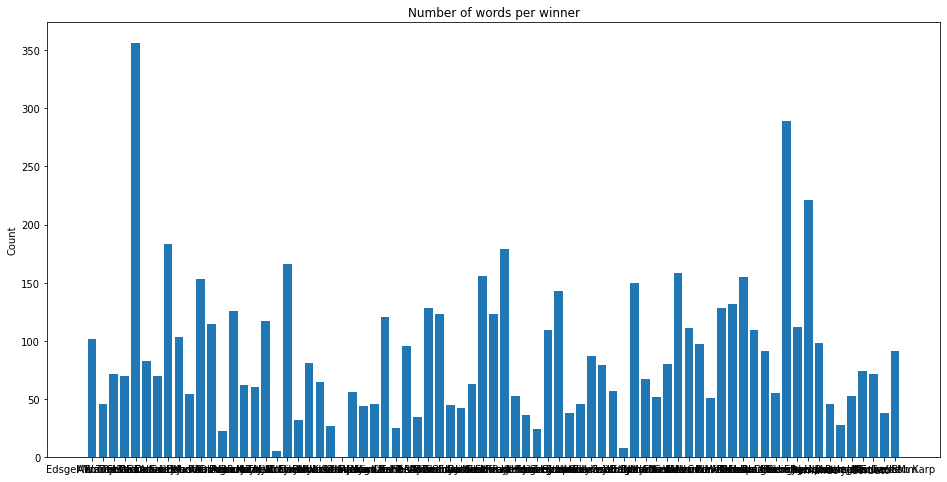

In [28]:
# number of paragraphs (1st plot)
# Create a bar plot from the DataFrame
plt.figure(1, figsize=(16,8))
plt.bar(award_winners_intro['winner_name'],award_winners_intro['count_words'])
plt.ylabel('Count')
plt.title('Number of words per winner')

# Show the plot
plt.show()

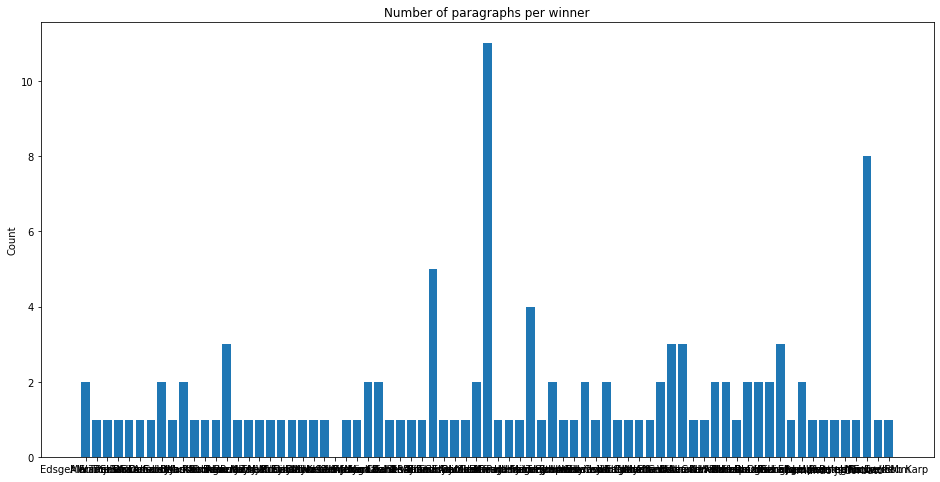

In [29]:
# number of paragraphs (3rd plot)
# Create a bar plot from the DataFrame
plt.figure(1, figsize=(16,8))
plt.bar(award_winners_intro['winner_name'],award_winners_intro['count_paragraphs'])
plt.ylabel('Count')
plt.title('Number of paragraphs per winner') 

# Show the plot
plt.show()

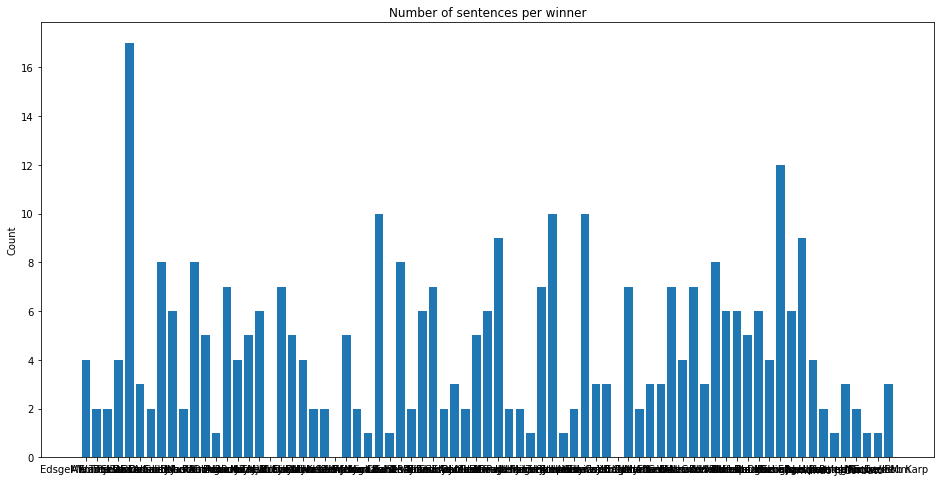

In [30]:
# number of sentences (2nd plot)
# Create a bar plot from the DataFrame
plt.figure(1, figsize=(16,8))
plt.bar(award_winners_intro['winner_name'],award_winners_intro['count_sentences'])
plt.ylabel('Count')
plt.title('Number of sentences per winner') 

# Show the plot
plt.show()

#### Task 12

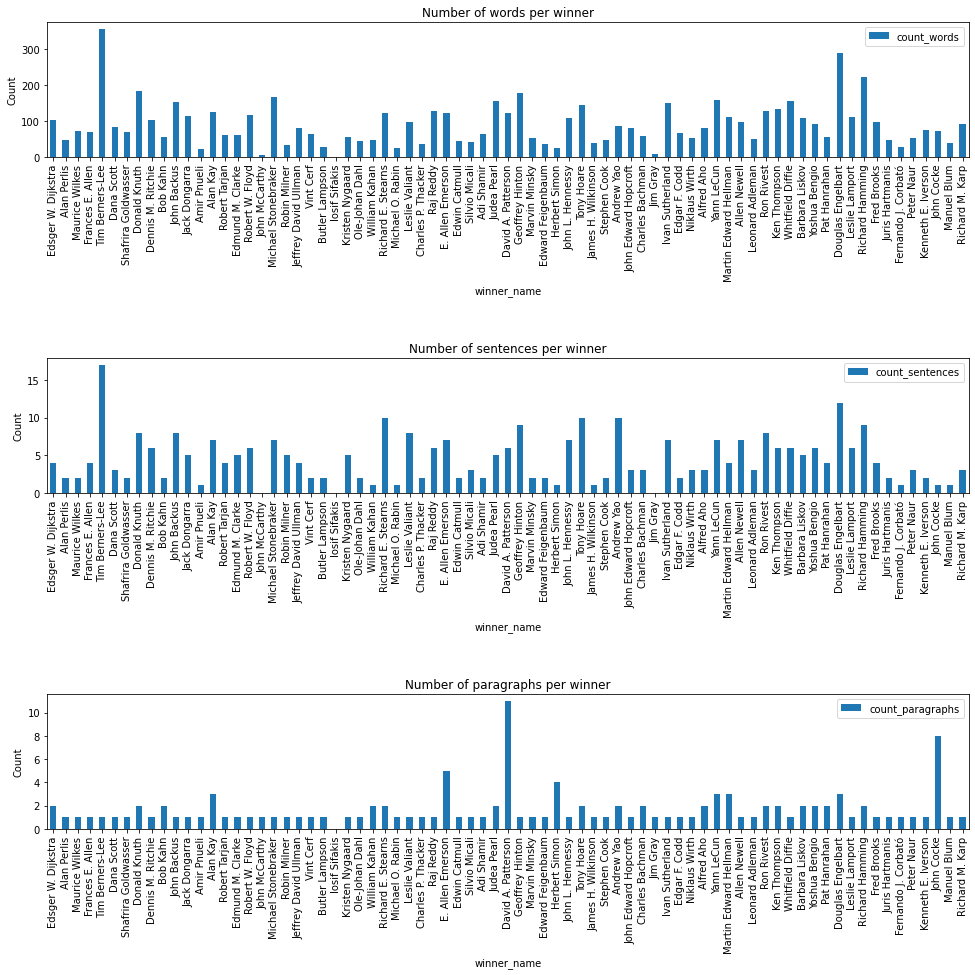

In [31]:
# Create the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16,14))

# Create the first barplot
axs[0] = award_winners_intro.plot(x='winner_name', y='count_words', kind='bar', ax=axs[0])
axs[0].set_ylabel('Count')
axs[0].set_title('Number of words per winner')

# Create the second barplot
axs[1] = award_winners_intro.plot(x='winner_name', y='count_sentences', kind='bar', ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_title('Number of sentences per winner')

# Create the third barplot
axs[2] = award_winners_intro.plot(x='winner_name', y='count_paragraphs', kind='bar', ax=axs[2])
axs[2].set_ylabel('Count')
axs[2].set_title('Number of paragraphs per winner')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1.5)

# Show the figure
plt.show()

#### Task 13

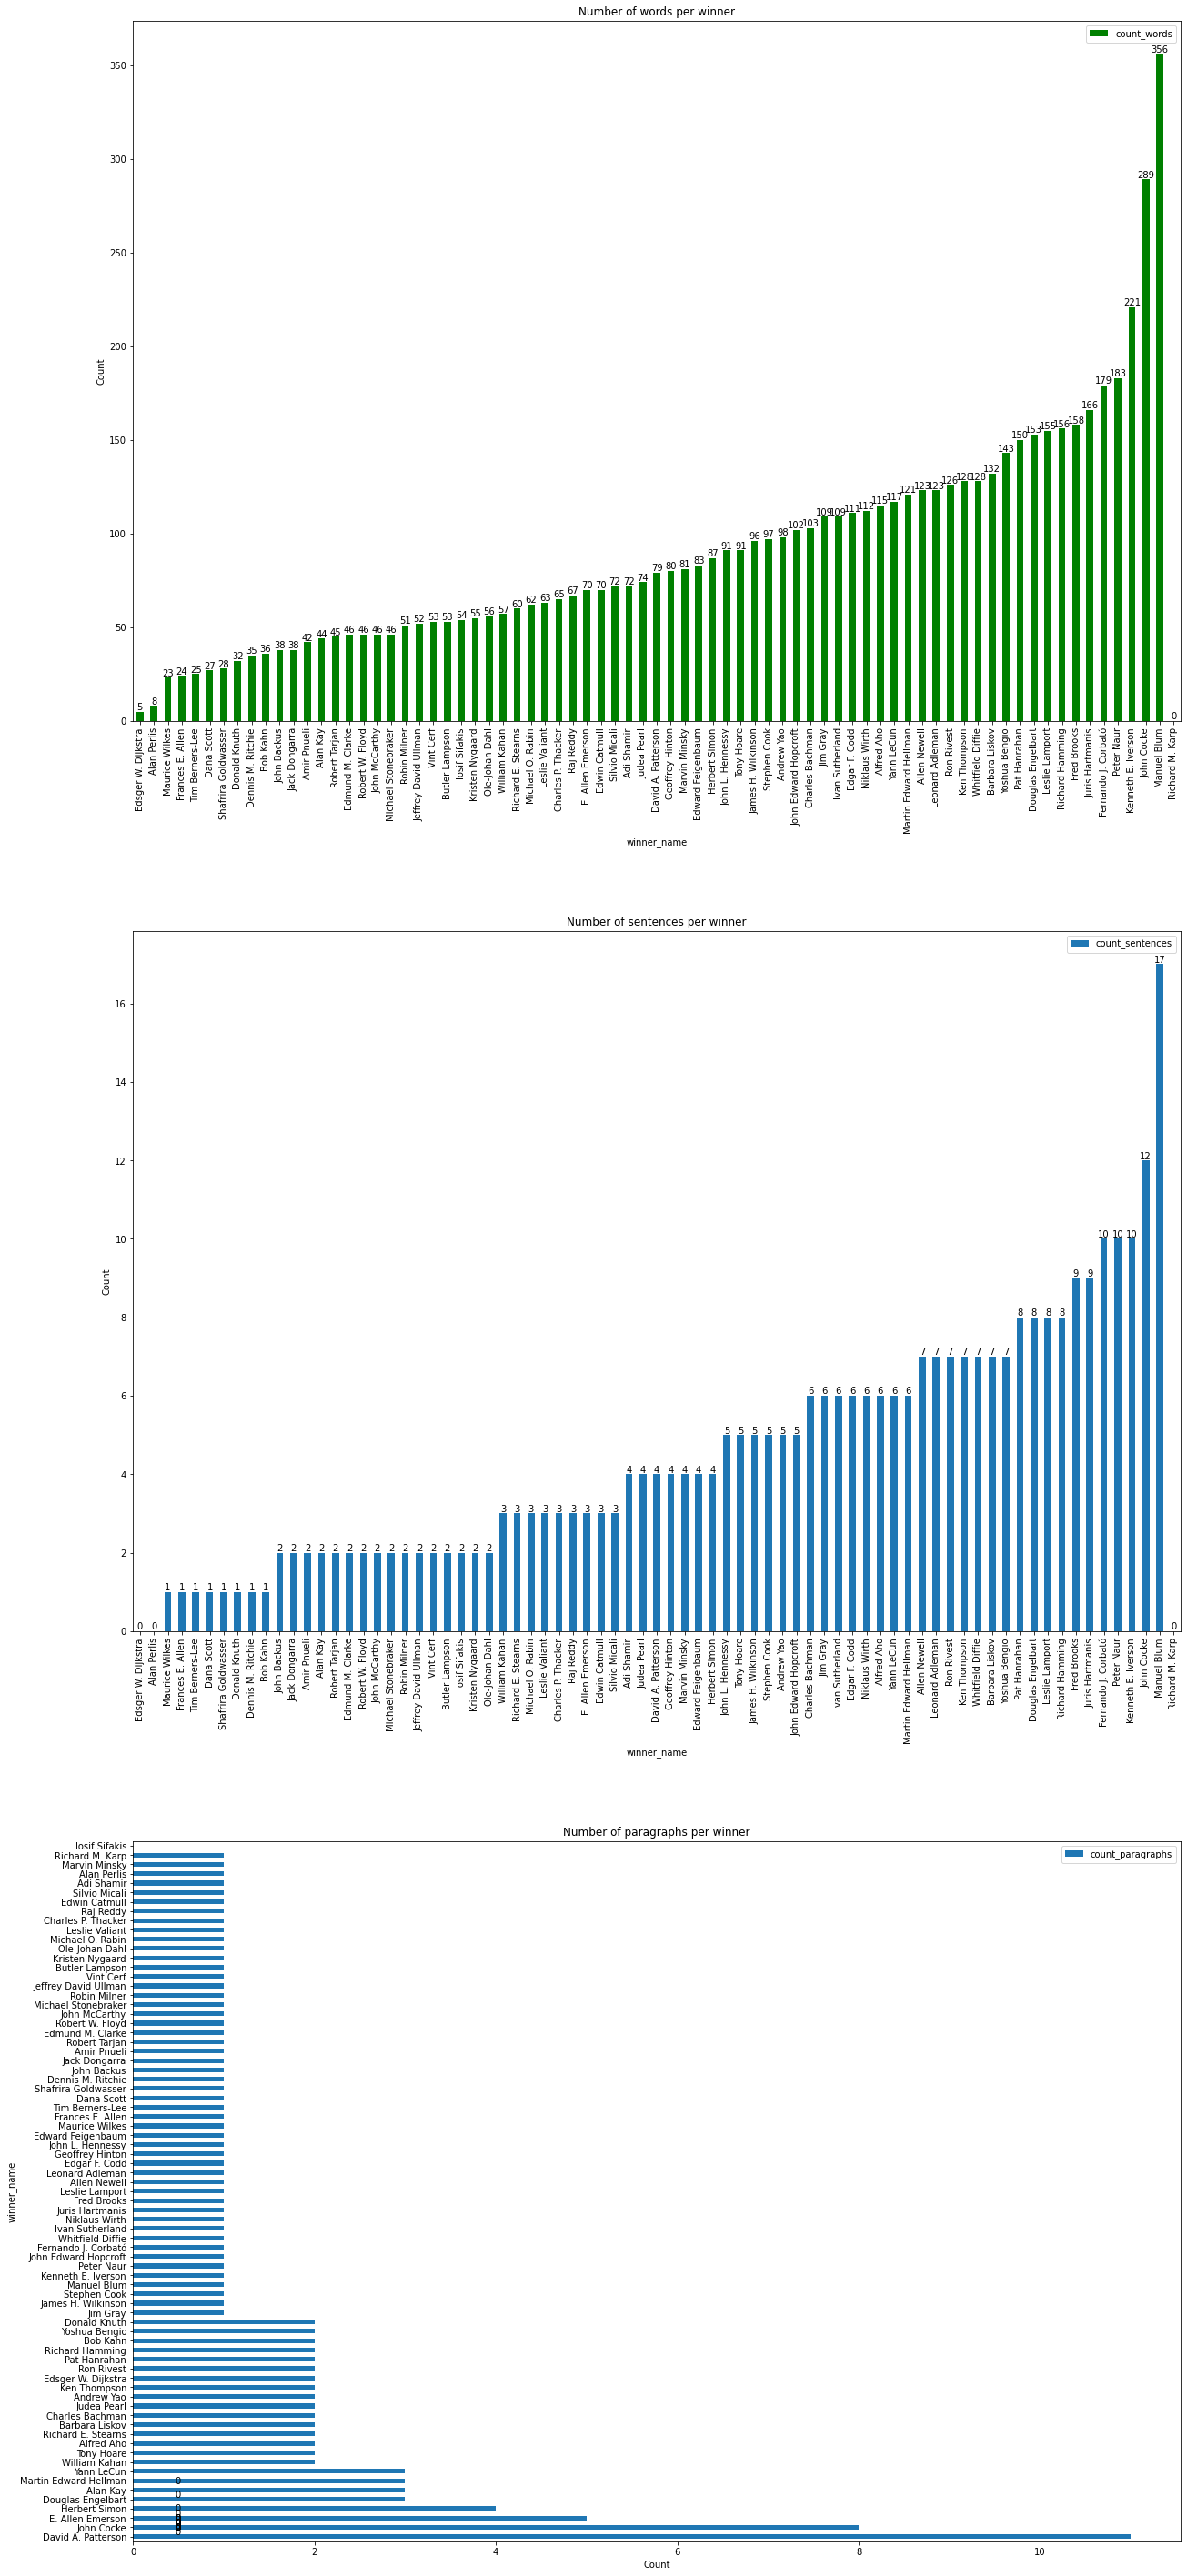

In [32]:
# Barplots after the changes

# Create the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20,35))

# Create the first barplot
award_winners_intro.sort_values(by='count_words',ascending=True).plot(
    x='winner_name', y='count_words', kind='bar', color="green", ax=axs[0]
)
axs[0].set_ylabel('Count')
axs[0].set_title('Number of words per winner')

# Rotating labels 90 degrees (The labels was already rotated, but here is the code anyway)
axs[0].set_xticklabels(award_winners_intro.winner_name, rotation=90)

# Add the count label to the bars
for rect in axs[0].patches:
    # Get the x and y coordinates of the bar
    x = rect.get_x()
    y = rect.get_height()
    
    # Add the text at the top of the bar
    axs[0].text(x + rect.get_width()/2., y, '%d' % int(y), ha='center', va='bottom')

# Create the second barplot
award_winners_intro.sort_values(by='count_sentences',ascending=True).plot(
    x='winner_name', y='count_sentences', kind='bar', ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_title('Number of sentences per winner')

# Rotating labels 90 degrees
axs[1].set_xticklabels(award_winners_intro.winner_name, rotation=90)

# Add the count label to the bars
for rect in axs[1].patches:
    # Get the x and y coordinates of the bar
    x = rect.get_x()
    y = rect.get_height()
    
    # Add the text at the top of the bar
    axs[1].text(x + rect.get_width()/2., y, '%d' % int(y), ha='center', va='bottom')

# Create the third barplot
award_winners_intro.sort_values(by='count_paragraphs',ascending=False).plot(
    x='winner_name', y='count_paragraphs', kind='barh', ax=axs[2])
axs[2].set_xlabel('Count')
axs[2].set_title('Number of paragraphs per winner')

# Add the count label to the horisontal bars
for rect in axs[2].patches:
    # Get the x and y coordinates of the bar in data coordinates
    x = rect.get_x() + rect.get_width()/2.
    y = rect.get_height()
    
    # Add the text at the top of the bar, with the x and y coordinates reversed and in data coordinates
    axs[2].text(y, x, '%d' % int(y), ha='center', va='bottom')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.3)

# Show the figure
plt.show()

# the count labels of the horistontal bar plot are not shown correctly

### 3.3.2 Heatmap

#### Task 14

In [33]:
# function to identify the bigrams of each award winnner
def bigrams_of_common_words_after_processing(text):
    bigram_freqs = Counter()
    # checning if the text is not NULL
    if text != None:
        text = str(text)
        # removing stopwords, punctuations and turning every word to lower case, in order to find all bigrams
        tokenized_cleaned_text = [token.lower() for token in word_tokenize(text) if token.isalpha() and token not in stop_words]
      
        # Extract the bigrams from the list of tokens
        bigramss = list(bigrams(tokenized_cleaned_text))
        # Update the frequency of each bigram
        bigram_freqs.update(bigramss)

        # return(tuple(bigramss))
        return(dict(bigram_freqs))

# the list with the tuples of top 15 bigrams
list_of_top_15 = [x[0] for x in top_15_sorted_winners_bigrams]

# function to count how many times the top 15 biagrams appear in the biagrams of each award winner intro
def top_15_bigrams_counter_for_each_award_winner(list_of_bigram_tuples):
    list_of_bigrams = []
    if list_of_bigram_tuples != None:
      for tup in list_of_bigram_tuples:
        if tup in list_of_top_15:
          freq = tuple([tup,list_of_bigram_tuples[tup]])
          list_of_bigrams.append(freq)

      return list_of_bigrams


[('computer', 'scientist'), ('turing', 'award'), ('computer', 'science'), ('american', 'computer'), ('received', 'turing'), ('programming', 'language'), ('he', 'also'), ('programming', 'languages'), ('best', 'known'), ('artificial', 'intelligence'), ('national', 'academy'), ('professor', 'computer'), ('david', 'patterson'), ('he', 'received'), ('acm', 'turing')]


In [34]:
# creating the dataframe using the award_winners dictionary
award_winners_heatman = pd.DataFrame(award_winners)
# dropping the irrelevant columns
award_winners_heatman.drop(['gender', 'birth_date','employer','educated_at'], axis=1, inplace=True)
# renaming the column name to winner_name
award_winners_heatman.rename(columns = {'name':'winner_name'}, inplace = True)
# adding the column bigram with the bigrams of the award_winners_heatman["intro"] applying the bigrams_of_common_words_after_processing function
award_winners_heatman["bigrams"] = award_winners_heatman["intro"].apply(bigrams_of_common_words_after_processing)
# adding the column "bigrams which are in the top 15" with the bigrams that are in the top 15 of the award_winners_heatman["bigrams"] applying the top_15_bigrams_counter_for_each_award_winner function
award_winners_heatman["bigrams which are in the top 15"] = award_winners_heatman["bigrams"].apply(top_15_bigrams_counter_for_each_award_winner)
# top_15_bigrams_counter_for_each_award_winner
df = award_winners_heatman[["winner_name","bigrams which are in the top 15"]]
df

,winner_name,bigrams which are in the top 15
0,Edsger W. Dijkstra,"[((computer, scientist), 1), ((he, received), ..."
1,Alan Perlis,"[((american, computer), 1), ((computer, scient..."
2,Maurice Wilkes,"[((computer, scientist), 1)]"
3,Frances E. Allen,"[((american, computer), 1), ((computer, scient..."
4,Tim Berners-Lee,"[((computer, scientist), 1), ((best, known), 1..."
...,...,...
70,Peter Naur,"[((computer, science), 1), ((turing, award), 1..."
71,Kenneth E. Iverson,"[((computer, scientist), 1), ((programming, la..."
72,John Cocke,"[((computer, scientist), 2), ((american, compu..."
73,Manuel Blum,"[((computer, scientist), 1), ((received, turin..."


In [43]:
# Here using a for loop I get the names, bigrams and the occurances and I put them in a ditionary. Then the dictionary is used to create a dataframe
# initlializing the list that bigrams, frequency and names of winners are going to be stored
listt_of_bgr_freq =[]
listt_of_bgr = []
listt_of_names = []

# for every row in the datadrame df
for x in range(df.shape[0]):
  # initializing empty temporary lists
  temp_listt_of_bgr_freq = []
  temp_listt_of_bgr = []
  temp_listt_of_names = []
  # If there is a list of biagrams in the dataframe
  if df['bigrams which are in the top 15'][x] != None:
    # for every bigram in the top 15 list
    for bigr_top in list_of_top_15:
      # for every bigram in the daraframe of the row x
      for bigr in df['bigrams which are in the top 15'][x]:
        # if the biagram in the top 15 list is equal to the bigram which is in the dataframe
        if bigr[0] == bigr_top:
          # appending the values to the temporary lists
          temp_listt_of_bgr.append(str(bigr_top))
          temp_listt_of_bgr_freq.append(bigr[1])
          temp_listt_of_names.append(df['winner_name'][x])

    # for every bigram in the top 15 list 
    for bigr_top in list_of_top_15:
      # If thr bigrams are not already in the temp list, append it and add the value 0 if there is not occurence
      if str(bigr_top) not in temp_listt_of_bgr:
        temp_listt_of_bgr.append(str(bigr_top))
        temp_listt_of_bgr_freq.append(0)
        temp_listt_of_names.append(df['winner_name'][x])

  # extending the initlial lists with the teporary ones
  listt_of_bgr.extend(temp_listt_of_bgr)
  listt_of_bgr_freq.extend(temp_listt_of_bgr_freq)
  listt_of_names.extend(temp_listt_of_names)

# Creating the dictionary to use for the dataframe
data = {'winner_name': listt_of_names, 'bigrams': listt_of_bgr, 'frequency': listt_of_bgr_freq}

# Creating the dataframe for the heatmap
df_heatmap = pd.DataFrame(data)

In [44]:
# reshaping the dataframe in order to be used in the heatmap
df_heatmap = df_heatmap.pivot_table(index='bigrams', columns='winner_name', values= 'frequency')
df_heatmap.head(10)

winner_name,Adi Shamir,Alan Kay,Alan Perlis,Alfred Aho,Allen Newell,Amir Pnueli,Andrew Yao,Barbara Liskov,Bob Kahn,Butler Lampson,...,Shafrira Goldwasser,Silvio Micali,Stephen Cook,Tim Berners-Lee,Tony Hoare,Vint Cerf,Whitfield Diffie,William Kahan,Yann LeCun,Yoshua Bengio
bigrams,,,,,,,,,,,,,,,,,,,,,
"('acm', 'turing')",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"('american', 'computer')",0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
"('artificial', 'intelligence')",0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"('best', 'known')",0,1,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
"('computer', 'science')",1,0,0,1,2,0,0,2,0,0,...,1,0,1,2,1,0,0,0,0,1
"('computer', 'scientist')",0,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,0,0,1,1,1
"('david', 'patterson')",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('he', 'also')",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
"('he', 'received')",0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


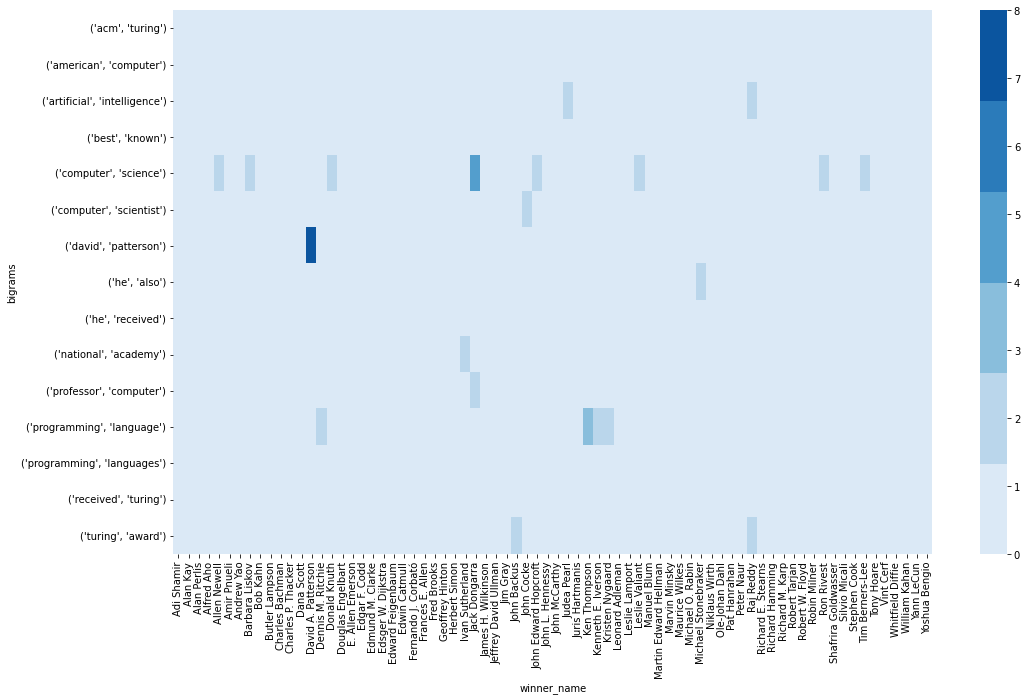

In [53]:
# Plotting the heatmap
plt.figure(figsize=(17,10))
# creating a colormap
colormap = sns.color_palette("Blues")
sns.heatmap(df_heatmap, cmap=colormap)